In [1]:
# 画像から猫｜犬を分類する画像分類器
# - tf.keras.preprocessing.image.ImageDataGeneratorクラスを用いてデータ入力パイプラインを作る
# - 過学習を防止する方法
# - データ拡張とドロップアウト
#
# 機械学習の基本的なワークフロー
# 1. データの調査と理解
# 2. 入力パイプラインの構築
# 3. モデルの構築
# 4. モデルの学習
# 5. モデルのテスト
# 6. モデルの改善とここまでのプロセスの繰り返し

In [2]:
# import packages
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load data
# Dogs vs Cats from Kaggle

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [5]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

In [7]:
num_cats_training = len(os.listdir(train_cats_dir))
num_dogs_training = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_train = num_cats_training + num_dogs_training
total_validation = num_cats_validation + num_dogs_validation

In [8]:
print('total training cat images:', num_cats_training)
print('total training dog images:', num_dogs_training)

print('total validation cat images:', num_cats_validation)
print('total validation dog images:', num_dogs_validation)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
# preprocessing data
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
sample_training_images, _ = next(train_data_gen)

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

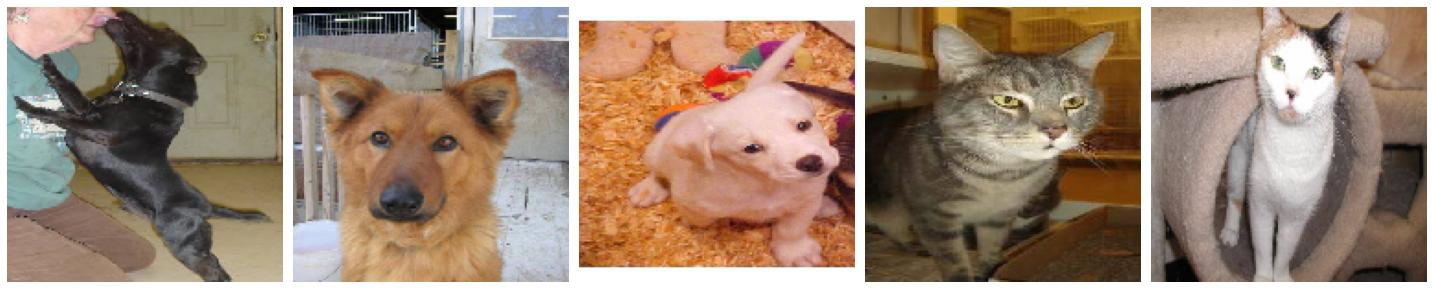

In [15]:
plotImages(sample_training_images[:5])

In [16]:
# build model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [20]:
# learning from data
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_validation // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 40s 546ms/step - loss: 1.1974 - accuracy: 0.4957 - val_loss: 0.6919 - val_accuracy: 0.5670
Epoch 2/15
15/15 [==============================] - 8s 510ms/step - loss: 0.6842 - accuracy: 0.5609 - val_loss: 0.6796 - val_accuracy: 0.5368
Epoch 3/15
15/15 [==============================] - 8s 509ms/step - loss: 0.6402 - accuracy: 0.6480 - val_loss: 0.6623 - val_accuracy: 0.5938
Epoch 4/15
15/15 [==============================] - 8s 513ms/step - loss: 0.5965 - accuracy: 0.6859 - val_loss: 0.5990 - val_accuracy: 0.6797
Epoch 5/15
15/15 [==============================] - 8s 509ms/step - loss: 0.5478 - accuracy: 0.7163 - val_loss: 0.5764 - val_accuracy: 0.7065
Epoch 6/15
15/15 [==============================] - 8s 512ms/step - loss: 0.5024 - accuracy: 0.7639 - val_loss: 0.5787 - val_accuracy: 0.7109
Epoch 7/15
15/15 [==============================] - 8s 517ms/step - loss: 0.4419 - accuracy: 0.8120 - val_loss: 0.5658 - val_accuracy: 0.7165
Epoch

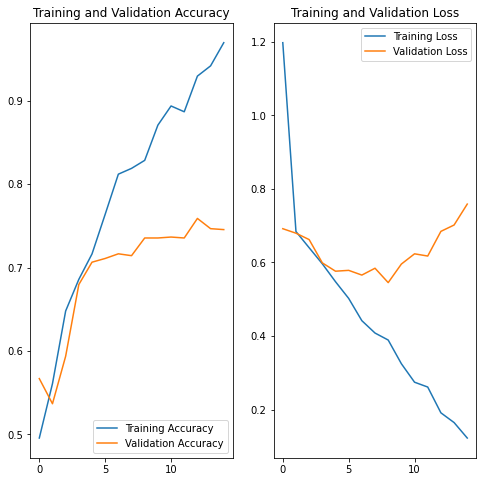

In [21]:
# visualize learning history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
# training accuracyとvalidation accuracyがだいぶ乖離してるので過学習してるサイン

In [23]:
# data augumentation: サンプル数を無理やり増やす
# 既存の学習サンプルに対してランダムな変換を行いデータセットとして利用できそうな画像を生成するアプローチ
# 学習中にモデルが全く同じ画像を2回以上利用しないようにすることでより多くの特徴を利用して汎化を狙う
# ImageDataGeneratorが便利

# 水平反転
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [27]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [28]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]

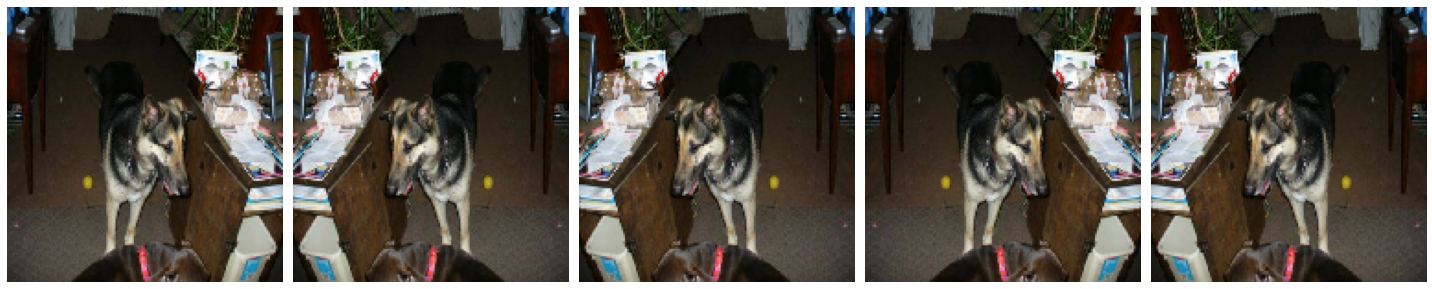

In [29]:
plotImages(augumented_images)

In [30]:
# 回転
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [31]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [32]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]

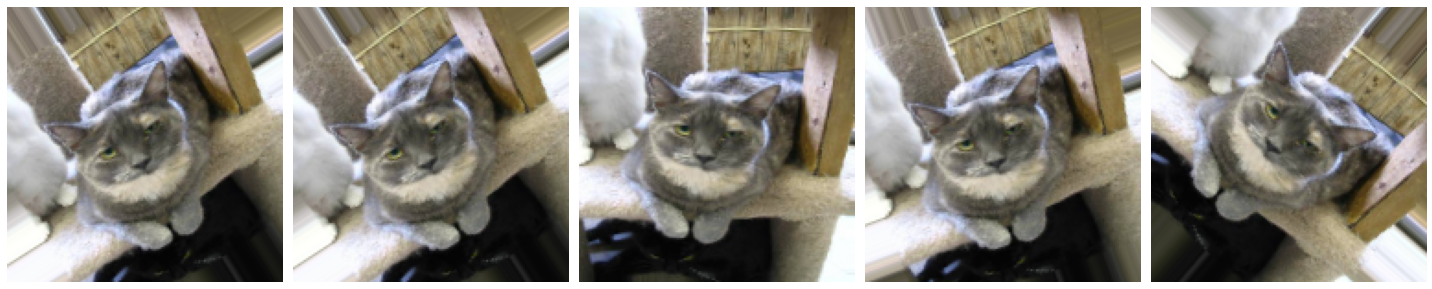

In [33]:
plotImages(augumented_images)

In [34]:
# 拡大
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [35]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [36]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]

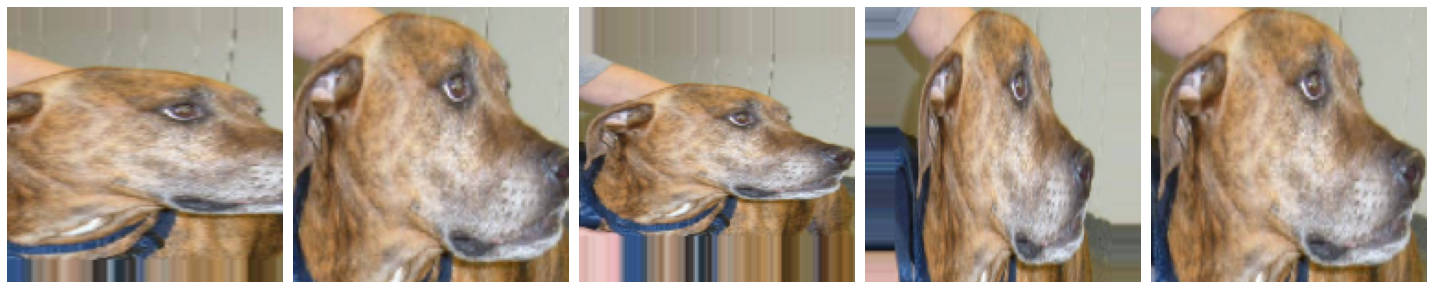

In [37]:
plotImages(augumented_images)

In [38]:
# 水平反転・回転・拡大をいっぺんに適用
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [39]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [40]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]

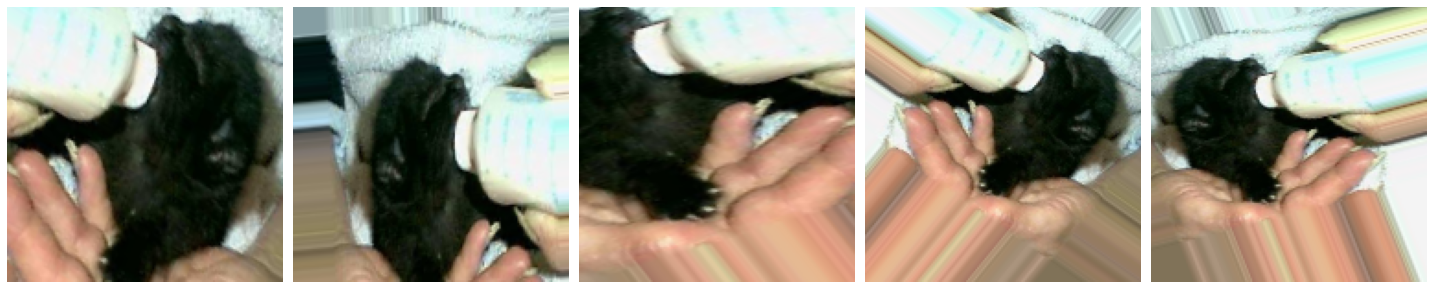

In [41]:
plotImages(augumented_images)

In [42]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [43]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [44]:
# dropout
# 重みを小さくする正則化の一つ

model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [45]:
model_new.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [46]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [47]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_validation // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 17s 1s/step - loss: 0.9022 - accuracy: 0.5043 - val_loss: 0.6919 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6926 - accuracy: 0.5005 - val_loss: 0.6917 - val_accuracy: 0.4955
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6920 - accuracy: 0.5043 - val_loss: 0.6917 - val_accuracy: 0.5792
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.6916 - accuracy: 0.5604 - val_loss: 0.6900 - val_accuracy: 0.5469
Epoch 5/15
15/15 [==============================] - 15s 1s/step - loss: 0.6916 - accuracy: 0.5513 - val_loss: 0.6890 - val_accuracy: 0.6183
Epoch 6/15
15/15 [==============================] - 15s 1s/step - loss: 0.6874 - accuracy: 0.5817 - val_loss: 0.6779 - val_accuracy: 0.6038
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 0.6821 - accuracy: 0.5641 - val_loss: 0.6749 - val_accuracy: 0.6507
Epoch 8/15
15/15 [==

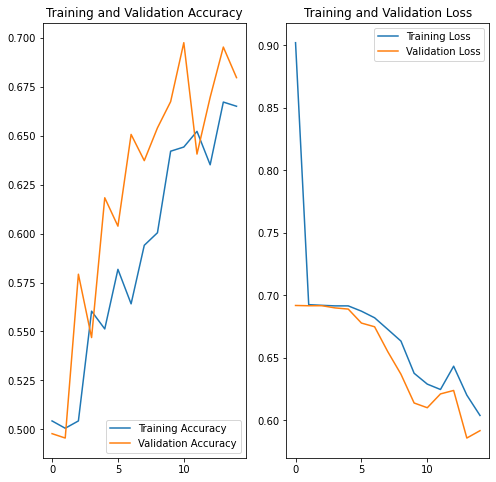

In [48]:
# visualize learning history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 確かにtraining時とvalidation時の差は小さくなった
# が，accuracyが7割ぐらいなのは同じ？epoch数を増やしたらもっｔ上がっていく？

In [49]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs * 2,
    validation_data=val_data_gen,
    validation_steps=total_validation // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
15/15 [==============================] - 16s 1s/step - loss: 0.5939 - accuracy: 0.6806 - val_loss: 0.5787 - val_accuracy: 0.6875
Epoch 2/30
15/15 [==============================] - 15s 1s/step - loss: 0.5883 - accuracy: 0.6944 - val_loss: 0.5756 - val_accuracy: 0.6942
Epoch 3/30
15/15 [==============================] - 15s 1s/step - loss: 0.5859 - accuracy: 0.6880 - val_loss: 0.5752 - val_accuracy: 0.7076
Epoch 4/30
15/15 [==============================] - 15s 1s/step - loss: 0.5718 - accuracy: 0.7051 - val_loss: 0.5822 - val_accuracy: 0.6886
Epoch 5/30
15/15 [==============================] - 15s 1s/step - loss: 0.5587 - accuracy: 0.7073 - val_loss: 0.5868 - val_accuracy: 0.6786
Epoch 6/30
15/15 [==============================] - 15s 1s/step - loss: 0.5655 - accuracy: 0.7035 - val_loss: 0.5502 - val_accuracy: 0.7121
Epoch 7/30
15/15 [==============================] - 15s 1s/step - loss: 0.5888 - accuracy: 0.6757 - val_loss: 0.5616 - val_accuracy: 0.7176
Epoch 8/30
15/15 [==

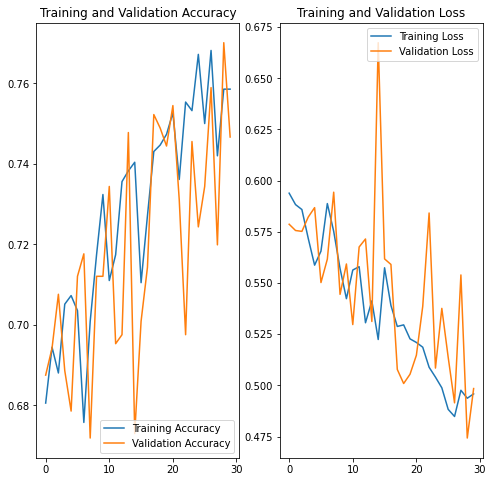

In [51]:
# visualize learning history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs * 2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()